In [2]:
import pandas as pd

df = pd.read_excel(r"C:\\Users\\lala7\Desktop\\研究所\\碩一上\\製造數據科學\\HW\\MDS_Assignment01\\MDS_Assignment1_OnlineRetail.xlsx")
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

In [3]:
for col in df.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [4]:
# 刪掉不需要的欄位，把Invoice, Stockcode欄位轉為str
df1 = df.drop(df.columns[[2, 3, 4, 5, 6, 7]],axis = 1)
df1["StockCode"] = df1["StockCode"].apply(str)
df1["InvoiceNo"] = df1["InvoiceNo"].apply(str)

In [5]:
# 轉 binary vectors
df2 = pd.get_dummies(df1, columns=['StockCode'], dtype = bool)
df2 = df2.groupby(['InvoiceNo']).sum().astype(bool)
df2.head()

,StockCode_10002,StockCode_10080,StockCode_10120,StockCode_10123C,StockCode_10123G,StockCode_10124A,StockCode_10124G,StockCode_10125,StockCode_10133,StockCode_10134,...,StockCode_M,StockCode_PADS,StockCode_POST,StockCode_S,StockCode_gift_0001_10,StockCode_gift_0001_20,StockCode_gift_0001_30,StockCode_gift_0001_40,StockCode_gift_0001_50,StockCode_m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df2

,StockCode_10002,StockCode_10080,StockCode_10120,StockCode_10123C,StockCode_10123G,StockCode_10124A,StockCode_10124G,StockCode_10125,StockCode_10133,StockCode_10134,...,StockCode_M,StockCode_PADS,StockCode_POST,StockCode_S,StockCode_gift_0001_10,StockCode_gift_0001_20,StockCode_gift_0001_30,StockCode_gift_0001_40,StockCode_gift_0001_50,StockCode_m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581499,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [7]:
# 找出符合minSupport的itemsets
from mlxtend.frequent_patterns import apriori
itemsets = apriori(df2, min_support=0.01, use_colnames=True)
print(itemsets)

       support                                           itemsets
0     0.020193                                  (StockCode_15036)
1     0.012587                                (StockCode_15056BL)
2     0.017876                                 (StockCode_15056N)
3     0.011236                                  (StockCode_16237)
4     0.012510                                  (StockCode_20675)
...        ...                                                ...
1082  0.010270  (StockCode_23203, StockCode_23199, StockCode_8...
1083  0.011429  (StockCode_23203, StockCode_23202, StockCode_8...
1084  0.010077  (StockCode_20723, StockCode_22355, StockCode_2...
1085  0.010386  (StockCode_22386, StockCode_21931, StockCode_8...
1086  0.011699  (StockCode_22698, StockCode_22697, StockCode_2...

[1087 rows x 2 columns]


In [8]:
# 篩選 length
itemsets['length'] = itemsets['itemsets'].apply(lambda x:len(x))
itemsets = itemsets[(itemsets['length'] <= 3 )]
itemsets

,support,itemsets,length
0,0.020193,(StockCode_15036),1
1,0.012587,(StockCode_15056BL),1
2,0.017876,(StockCode_15056N),1
3,0.011236,(StockCode_16237),1
4,0.012510,(StockCode_20675),1
...,...,...,...
1079,0.012124,"(StockCode_22726, StockCode_22727, StockCode_2...",3
1080,0.010077,"(StockCode_22726, StockCode_22730, StockCode_2...",3
1081,0.010425,"(StockCode_23203, StockCode_23200, StockCode_2...",3
1082,0.010270,"(StockCode_23203, StockCode_23199, StockCode_8...",3


In [11]:
# 篩選 confidence
from mlxtend.frequent_patterns import association_rules
rules = association_rules(itemsets, metric = 'confidence', min_threshold = 0.81)

In [12]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Generate a heatmap with annotations on and the colorbar off
tx = np.array(rules.lift)
# tx

# Transform the DataFrame of rules into a matrix using the lift metric
# pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
pivot = rules.pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')


C:\Users\lala7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


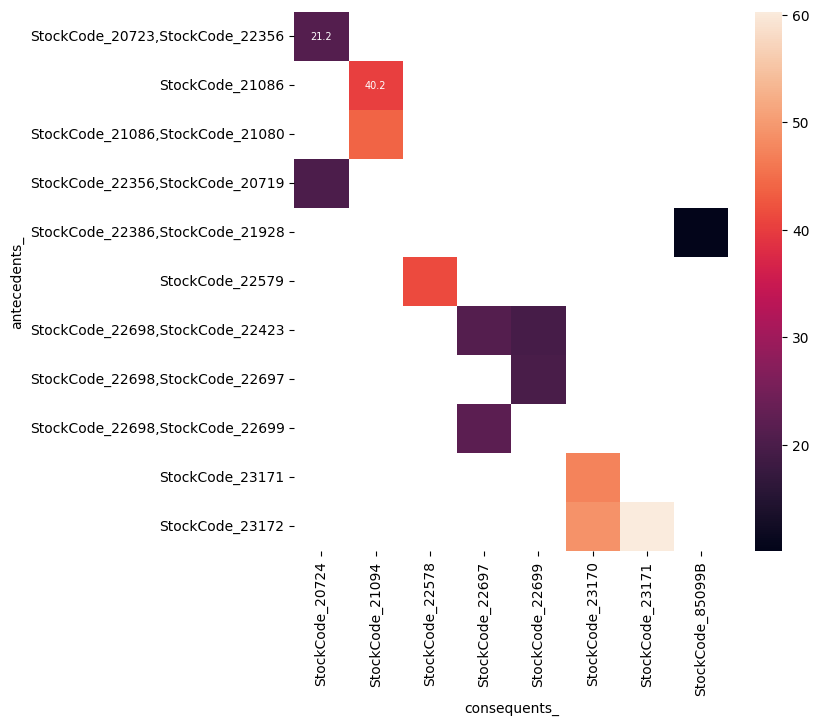

In [13]:
plt.figure(figsize=(7,7))
s = sns.heatmap(pivot, annot = True, annot_kws={"size": 7}, fmt='.1f')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()